In [411]:
import numpy as np

In [412]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.001, max_iters=1000):
        """Constructor of a class containing learning rate value and how many iterations we do for our gradient descent."""
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.weights = None
        self.bias = None
         
    def _sigmoid(self, linear_model):
        """private method used as a helper method for converting our linear model to fall between 0 and 1."""
        return 1 / (1 + np.exp(-linear_model))
    
    def cost_function(self, h, y): # h being our predicted labels vector, y is the actual labels vector
        """Returns the error of our prediction."""
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        
        
    def fit(self, X_train, y_train): #X_train ->mxn matrix, y_train-> 1xm, where m is the #samples, n is the #features
        """takes training samples with their labels to fit the model with a good weights and bias values using gradient descent"""
        
        # unpacking the shape of X_train to give n_samples the #rows in X_train, n_features the #cols in X_train 
        n_samples, n_features = X_train.shape
        
        # The cost vector for every 10 iterations.
        costs_train = []
        
        #initializing our weights and bias.
        self.weights = np.zeros(n_features) #1xn vector.
        self.bias = 0
        
        # gradient descent
        for _ in range(self.max_iters):
            # f(x) = wx + b
            # mxn . nx1 --> mx1
            linear_model = np.dot(X_train, self.weights) + self.bias
            
            # predicted label = sigmoid(f(x)) so that our predictions lies between 0 and 1.
            y_predictions_train = self._sigmoid(linear_model) # mx1 all values between 0 and 1
            
            # computation of cost function for the training dataset.
            cost_train = self.cost_function(y_predictions_train, y_train)
            
            # nx1 vector showing rate of change of the cost function with respect to the weights.
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predictions_train - y_train)) #nxm . mx1 --> nx1
            # rate of change of the cost function with respect to the bias.
            db = (1 / n_samples) * np.sum(y_predictions_train - y_train)
            
            # update our weights and bias.
            self.weights -= self.learning_rate * dw
            self.bias -=self.learning_rate * db
            
            
            # store all training costs in a list for plotting.
            if _ % 10 == 0: # for every 10 iterations.
                costs_train.append(cost_train)
                
            print('Training cost ' + str(cost_train))# printing the cost for every iteration.
            
        # plotting the training costs per 10 iterations to check if the error is decreasing or not.
        plt.plot(costs_train)
        plt.xlabel('Iterations per tens')
        plt.ylabel('Training cost')
        plt.title('Learning rate ' + str(self.learning_rate))
        plt.show()
            

            
        
    def predict(self, X_test): #X_test ->mxn matrix
        """takes test samples without their labels that we would like to predict using this method."""
        # f(x) = wx + b
        # mxn . nx1 --> mx1
        linear_model = np.dot(X_test, self.weights) + self.bias

        # predicted label = sigmoid(f(x)) so that our predictions lies between 0 and 1.
        y_predicted = self._sigmoid(linear_model) # mx1 all values between 0 and 1
        
        #Threshold classifier.
        y_predicted_cls = [1 if prob > 0.5 else 0 for prob in y_predicted]
        return y_predicted_cls

# Let's test our model.

In [413]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt

In [414]:
# Breast cancer dataset labeling the tumor as malignant or benign
df = datasets.load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [415]:
# The possible labels.
df['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [416]:
# Labels for all the data samples.
df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [417]:
# 569 data samples with 30 features for each sample.
df['data'].shape

(569, 30)

In [418]:
X, y = df['data'], df['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [419]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [420]:
X_train.shape

(398, 30)

In [421]:
X_test.shape

(171, 30)

In [422]:
# our logistic regression model that we created.
lr_model = LogisticRegression(learning_rate=0.0001, max_iters=1000)

Training cost 0.6931471805599452
Training cost 4.040956713357011
Training cost nan
Training cost 12.202375902624711
Training cost inf
Training cost 20.27537422684501
Training cost 1.528042455857743
Training cost 25.409628286501732
Training cost 3.2168198844449583
Training cost nan
Training cost 11.560067477082002
Training cost inf
Training cost 19.63342809573654
Training cost 1.275245165546511
Training cost 19.90861544024754
Training cost 0.885153804969095
Training cost 15.22148803350485
Training cost inf
Training cost 23.285919685142495
Training cost 1.256774188602762
Training cost nan
Training cost 13.409234017897163
Training cost inf
Training cost 21.47434333689503
Training cost 0.3618287318903614
Training cost 2.1959085477216713
Training cost 19.369035018766372
Training cost 0.7194080352794132
Training cost 7.889069252576295
Training cost nan
Training cost 15.970324048520375
Training cost inf
Training cost 20.10065984798661
Training cost 0.395599219507182
Training cost 2.1908161603

c:\users\aly\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
c:\users\aly\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply



Training cost 0.5701858011097402
Training cost 0.7113107860278586
Training cost 0.5711919462025162
Training cost 0.7134898449285108
Training cost 0.5722126949711771
Training cost 0.7156091914120485
Training cost 0.573238682346271
Training cost 0.7176568766055459
Training cost 0.5742680933571793
Training cost 0.7196338749957664
Training cost 0.5753017649691232
Training cost 0.721545489424709
Training cost 0.5763413891284358
Training cost 0.7233982479846642
Training cost 0.5773888747601745
Training cost 0.7251988216357569
Training cost 0.578446135205381
Training cost 0.7269536756823266
Training cost 0.5795150283619733
Training cost 0.7286689804727543
Training cost 0.5805973495393022
Training cost 0.7303506093153658
Training cost 0.5816948409363152
Training cost 0.7320041632589313
Training cost 0.5828092050227102
Training cost 0.7336350031809842
Training cost 0.5839421175493574
Training cost 0.7352482790031999
Training cost 0.5850952389123708
Training cost 0.7368489562692795
Training cos

Training cost inf
Training cost 3.4495382828142733
Training cost inf
Training cost 2.922107429555831
Training cost inf
Training cost 1.9716910336376368
Training cost 2.3507056736098906
Training cost 1.047828899029709
Training cost 1.1073106427356902
Training cost 0.6560017755922574
Training cost 0.6856320723475384
Training cost 0.45840051384133695
Training cost 0.4900386986984946
Training cost 0.40512159443442597
Training cost 0.4164768244774681
Training cost 0.4041942426415117
Training cost 0.4154221671548842
Training cost 0.4036856411545937
Training cost 0.41508502586943924
Training cost 0.4032713420267994
Training cost 0.4149030873702927
Training cost 0.40288204564904767
Training cost 0.414755856290953
Training cost 0.40250187158117473
Training cost 0.4146157399230084
Training cost 0.4021272470902575
Training cost 0.41447653633421944
Training cost 0.40175741596141057
Training cost 0.41433693599055665
Training cost 0.4013922454356683
Training cost 0.4141967180867623
Training cost 0.4

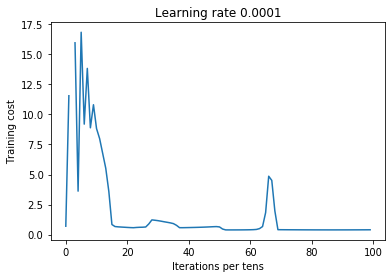

In [423]:
# fitting our training data to get the best parameters b and w
lr_model.fit(X_train, y_train)

In [424]:
# returst a list of predicted labels for the test sample then I convert it to a numpynd array
predictions = np.asarray(lr_model.predict(X_test))

In [425]:
def accuracy (y_true, y_pred):
    """how many labels are correctly assigned of our predicted labels with the actual labels"""
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [426]:
# 88 % of our testsamples were predicted correctly
print("Logistic Regression classification accuracy", accuracy(y_test, predictions))

Logistic Regression classification accuracy 0.8888888888888888


In [427]:
# The weights assigned to all 30 features.
lr_model.weights

array([ 2.96919417e-02,  3.91700941e-02,  1.71170135e-01,  7.20803272e-02,
        2.60492343e-04, -1.82499772e-04, -5.77167964e-04, -2.46072525e-04,
        5.14827063e-04,  2.07510443e-04,  6.94242167e-05,  2.35333457e-03,
       -1.79874779e-03, -8.72523618e-02,  1.87921747e-05, -4.65154257e-05,
       -6.10624931e-05, -7.82124277e-06,  5.31635338e-05,  4.51417999e-07,
        3.12893932e-02,  4.62895306e-02,  1.69429636e-01, -1.02156819e-01,
        3.20995705e-04, -7.62260681e-04, -1.28448328e-03, -3.07737080e-04,
        7.10225113e-04,  1.67801958e-04])

In [428]:
# The bias of our model.
lr_model.bias

0.003866452787912248